# Clustering con el algoritmo k-means en dataset 2D

En este ejemplo aplicaremos el algoritmo k-means para agrupar un conjunto de observaciones en 2D y ver como funciona el algoritmo básico.

#### Configuración de tamaño de gráficos

In [1]:
options(repr.plot.width=5, repr.plot.height=4, scipen = 999)

#### Instalación y carga de paquetes necesarios

In [2]:
list.of.packages <- c('ggplot2', 'ggthemes', 'R.matlab')

new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos = "https://cran.r-project.org")

library(ggplot2)
library(ggthemes)
library(R.matlab)

R.matlab v3.6.1 (2016-10-19) successfully loaded. See ?R.matlab for help.

Attaching package: 'R.matlab'

The following objects are masked from 'package:base':

    getOption, isOpen



#### Carga de datos

In [3]:
X <- as.data.frame(readMat('ex7data2.mat'))

### Exploración de datos

In [4]:
str(X)
head(X)

'data.frame':	300 obs. of  2 variables:
 $ X.1: num  1.84 5.66 6.35 2.9 3.23 ...
 $ X.2: num  4.61 4.8 3.29 4.61 4.94 ...


X.1,X.2
1.842080,4.607572
5.658583,4.799964
6.352579,3.290854
2.904017,4.612204
3.231979,4.939894
1.247923,4.932678


## Visualización

### Gráfico de dispersión 

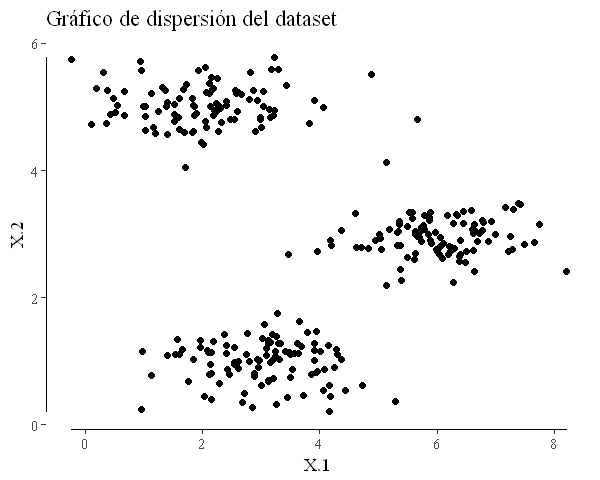

In [5]:
ggplot(X, aes(x = X.1, y = X.2)) + geom_point() + ggtitle('Gráfico de dispersión del dataset') + theme_tufte() + 
        geom_rangeframe()

A simple viste podemos ver que existen 3 grupos bastante heterogéneos.

#### Inicializamos la cantidad de centroides y sus posiciones

In [6]:
K <- 3

initial_centroids <- matrix(c(3, 3, 6, 2, 8 , 5), ncol = 2)
initial_centroids

3,2
3,8
6,5


#### Agregamos los centroides iniciales a nuestro gráfico

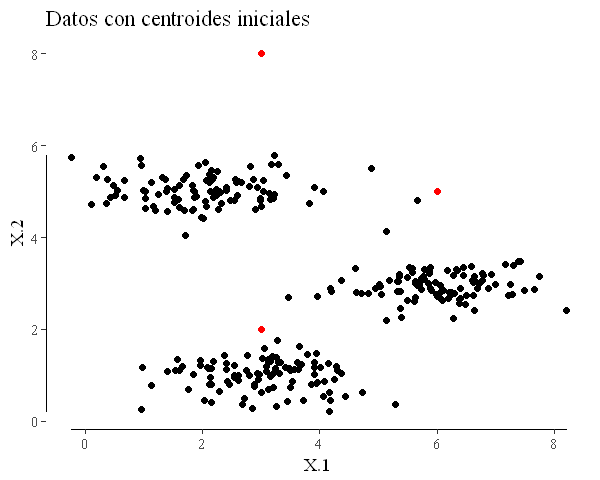

In [7]:
temp_centroids <- as.data.frame(initial_centroids)
names(temp_centroids) <- c('X.1', 'X.2')

ggplot(X, aes(x = X.1, y = X.2)) + geom_point() + ggtitle('Datos con centroides iniciales') + theme_tufte() + geom_rangeframe() +
    geom_point(data = temp_centroids, aes(x = X.1, y = X.2), colour = 'red')

Ahora tenemos que encontrar el centroide más cercano para cada observación en X

In [8]:
findClosestCentroids <- function(X, centroids) {
    
    K <- nrow(centroids)
    m <- nrow(X)
    
    idx <- rep(0, m)
    
    for(i in 1:m) {
        
        d_min <- 99999999
        
        for(j in 1:K) {
            
            distance <- (sum((X[i,] - centroids[j,]) ^ 2)) ^ (1/2)
            
            if(distance < d_min) {
                d_min <- distance
                idx[i] <- j
            }
        }
    }
    
    return(idx)
    
}


idx <- findClosestCentroids(X, initial_centroids)

Graficamos los puntos teniendo en cuenta la primera asignación de centroides (en azul) para las observaciones.

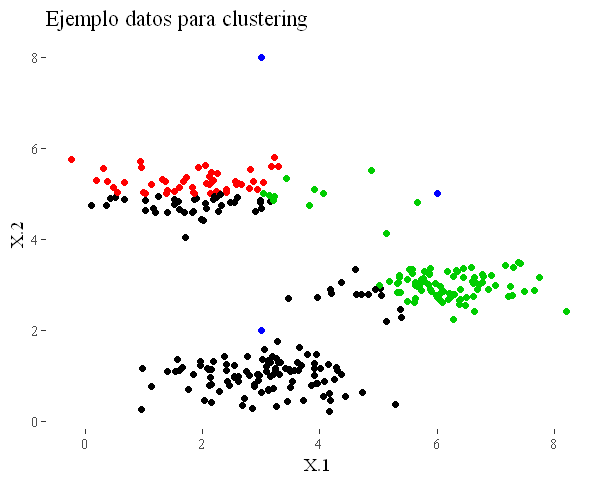

In [9]:
temp_centroids <- as.data.frame(initial_centroids)
names(temp_centroids) <- c('X.1', 'X.2')

gg <- ggplot(X, aes(x = X.1, y = X.2)) + geom_point(col = idx) +
        geom_point(data = temp_centroids, aes(x = X.1, y = X.2), colour = 'blue') +
        ggtitle('Ejemplo datos para clustering') + 
        theme_tufte()

gg

El siguiente paso es mover los centroides de tal forma que sean igual al promedio de los puntos que agrupa.

In [10]:
computeCentroids <- function(X, idx, K) {
    
    m <- nrow(X)
    n <- ncol(X)
    idx <- as.numeric(idx)
    
    centroids <- matrix(rep(0, K * n), ncol = n, nrow = K)
    
    for(i in 1:K) {
        
        idx_X <- which(idx %in% i)
        
        centroids[i,] <- colMeans(X[idx_X,])
    }
    
    return(centroids)
}

centroids <- computeCentroids(X, idx, K)

Nuevas posiciones de los centroides:

In [11]:
centroids

2.863568,2.140427
1.833826,5.269081
5.986722,3.200406


Graficamos las nuevas posiciones de los centroides.

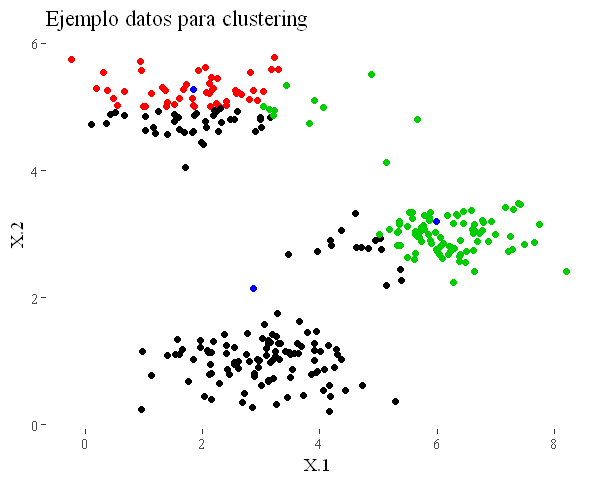

In [12]:
temp_centroids <- as.data.frame(centroids)
names(temp_centroids) <- c('X.1', 'X.2')

gg <- ggplot(X, aes(x = X.1, y = X.2)) + geom_point(col = idx) +
        geom_point(data = temp_centroids, aes(x = X.1, y = X.2), colour = 'blue') +
        ggtitle('Ejemplo datos para clustering') + 
        theme_tufte()

gg

#### Ahora que sabemos como funciona el algoritmo lo utilizaremos con varias iteraciones

Inicializamos algunos parámetros:

In [13]:
K <- 3
max_iters <- 10
initial_centroids <- matrix(c(3, 3, 6, 2, 8 , 5), ncol = 2)

runkMeans <- function(X, initial_centroids, max_iters) {
    
    m <- nrow(X)
    n <- ncol(X)
    
    K <- nrow(initial_centroids)
    centroids <- initial_centroids
    idx <- rep(0, m)
    
    for(i in 1:max_iters) {
        
        idx <- findClosestCentroids(X, centroids)
        centroids <- computeCentroids(X, idx, K)
        
    }
    
    return(list(centroids = centroids, idx = idx))
    
}

results <- runkMeans(X, initial_centroids, max_iters)
centroids <- results[[1]]
idx <- results[[2]]

#### Graficamos los clusters y centroides resultantes luego de 10 iteraciones

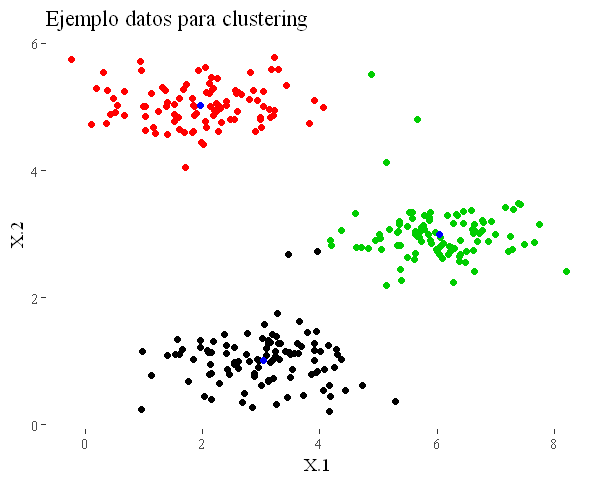

In [14]:
temp_centroids <- as.data.frame(centroids)
names(temp_centroids) <- c('X.1', 'X.2')

gg <- ggplot(X, aes(x = X.1, y = X.2)) + geom_point(col = idx) +
        geom_point(data = temp_centroids, aes(x = X.1, y = X.2), colour = 'blue') +
        ggtitle('Ejemplo datos para clustering') + 
        theme_tufte()

gg

También podemos almacenar los valores historicos de los centroides y ver como se fueron "moviendo". 
***
En el siguiente caso los centroides iniciales serán iguales a puntos al azar en nuestros datos.
Por otro lado aumentaremos el número de iteraciones.

#### Inicializamos algunos parámetros

In [15]:
K <- 3
max_iters <- 50

set.seed(123)
index <- sample(1:nrow(X), 3)
initial_centroids <- as.matrix(X[index,])

runkMeans <- function(X, initial_centroids, max_iters) {
    
    m <- nrow(X)
    n <- ncol(X)
    
    K <- nrow(initial_centroids)
    centroids <- initial_centroids
    idx <- rep(0, m)
    c1_hist <- centroids[1,]
    c2_hist <- centroids[2,]
    c3_hist <- centroids[3,]
    
    for(i in 1:max_iters) {
        
        idx <- findClosestCentroids(X, centroids)
        centroids <- computeCentroids(X, idx, K)
        c1_hist <- rbind(c1_hist, centroids[1,])
        c2_hist <- rbind(c2_hist, centroids[2,])
        c3_hist <- rbind(c3_hist, centroids[3,])
        
    }
    
    return(list(centroids = centroids, idx = idx, c1_hist = c1_hist, c2_hist = c2_hist, c3_hist = c3_hist))
    
}

#Ejecutamos el algoritmo de clustering 
results <- runkMeans(X, initial_centroids, max_iters)

cat("Posiciones iniciales de centroides:\n")
initial_centroids

cat("Posiciones finales de centroides:\n")
centroids <- as.data.frame(results$centroids)
names(centroids) <- c('X.1', 'X.2')
centroids

Posiciones iniciales de centroides:


,X.1,X.2
87,2.568695,5.206879
236,5.860679,2.995771
122,4.431530,0.540410


Posiciones finales de centroides:


X.1,X.2
1.953995,5.025570
6.033667,3.000525
3.043671,1.015410


#### Preparamos los datos y graficamos.

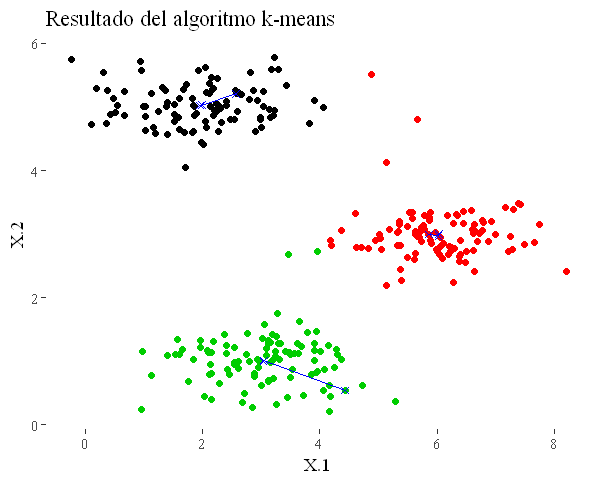

In [16]:
plotKmeans <- function() {

        idx <- results$idx
                
        c1_pos <- as.data.frame(results$c1_hist)
        names(c1_pos) <- c('X.1', 'X.2')

        c2_pos <- as.data.frame(results$c2_hist)
        names(c2_pos) <- c('X.1', 'X.2')

        c3_pos <- as.data.frame(results$c3_hist)
        names(c3_pos) <- c('X.1', 'X.2')

        gg <- ggplot(X, aes(x = X.1, y = X.2)) + geom_point(col = idx) +
                
                geom_point(data = c1_pos, aes(x = X.1, y = X.2), col = "blue", shape = 4) +
                geom_line(data = c1_pos, aes(x = X.1, y = X.2), col = "blue") +

                geom_point(data = c2_pos, aes(x = X.1, y = X.2), col = "blue", shape = 4) +
                geom_line(data = c2_pos, aes(x = X.1, y = X.2), col = "blue") +

                geom_point(data = c3_pos, aes(x = X.1, y = X.2), col = "blue", shape = 4) +
                geom_line(data = c3_pos, aes(x = X.1, y = X.2), col = "blue") +

                ggtitle('Movimientos de centroides') + 
                theme_tufte()

        gg
    }

plotKmeans() + ggtitle("Resultado del algoritmo k-means")

***
Para el siguiente caso podemos ver como el algoritmo se queda en un minimo local, es decir, reasignar cualquier punto a un nuevo cluster incrementaría la distancia total entre puntos y centroides, pero se puede llegar a una mejor solución si se inicializa de manera diferente los centroides.

Posiciones iniciales de centroides:


,X.1,X.2
100,1.7281820,5.360284
200,2.7391191,1.100723
300,0.9404894,5.715568


Posiciones finales de centroides:


X.1,X.2
2.576205,5.048910
4.522055,1.980685
1.032396,5.000765


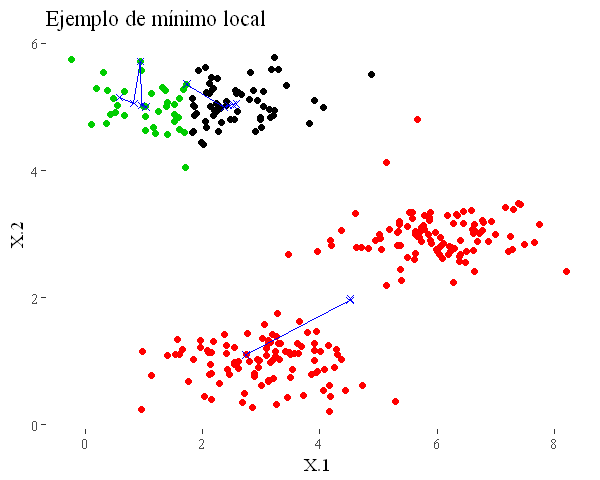

In [17]:
K <- 3
max_iters <- 30
initial_centroids <- as.matrix(X[c(100,200,300),])

#Ejecutamos el algoritmo de clustering 
results <- runkMeans(X, initial_centroids, max_iters)

cat("Posiciones iniciales de centroides:\n")
initial_centroids

cat("Posiciones finales de centroides:\n")
centroids <- as.data.frame(results$centroids)
names(centroids) <- c('X.1', 'X.2')
centroids

#Graficamos
plotKmeans() + ggtitle('Ejemplo de mínimo local')